In [111]:
# Import libraries
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [112]:
#read Data
hotels_df=pd.read_csv("hotel_bookings.csv")

In [113]:
#les 5 premiers lignes du data
hotels_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [114]:
#dimension du data (119390, 32)
hotels_df.shape

(119390, 32)

In [115]:
#info du data
hotels_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [116]:
#les valeurs manquantes dans chaque colonne
hotels_df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [117]:
#le nombre total des valeurs manquantes est 129425
hotels_df.isna().sum().sum()

129425

In [118]:
#### On supprime les lignes ayant des valeurs manquantes, à l'exception des variables comme 'agent' ou 'company',
# «NULL» est présenté comme l'une des catégories.

### On peut faire comme ça

# hotels_df.dropna(subset=['hotel','is_canceled','lead_time','arrival_date_year','arrival_date_month','arrival_date_week_number',
#                         'arrival_date_day_of_month','stays_in_weekend_nights','stays_in_week_nights','adults','children',
#                         'babies','meal','country','market_segment','distribution_channel','is_repeated_guest',
#                        'is_repeated_guest','previous_cancellations','previous_bookings_not_canceled','reserved_room_type',
#                        'assigned_room_type','booking_changes','deposit_type','days_in_waiting_list','customer_type',
#                        'adr','required_car_parking_spaces','total_of_special_requests','reservation_status','reservation_status_date'],
#                        inplace=True)

### Mais on peut remarquer que seul les variables 'country' et 'children' ont des valeures manquantes
hotels_df.dropna(subset=['country', 'children'], inplace=True)



In [119]:
#on verifie que les valeurs manquantes sont supprimées dans chaque colonne
hotels_df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               0
babies                                 0
meal                                   0
country                                0
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16004
company         

In [120]:
### On veut changer arrival year, month and day à arrival_date qui a un format 'datetime'
## On change d'abord le nom du mois en un nombre 
hotels_df['arrival_date_month'] = hotels_df['arrival_date_month'].apply(lambda month: dt.datetime.strptime(month, '%B').month)

In [121]:
hotels_df['arrival_date_month']

0         7
1         7
2         7
3         7
4         7
         ..
119385    8
119386    8
119387    8
119388    8
119389    8
Name: arrival_date_month, Length: 118898, dtype: int64

In [122]:
hotels_df['year'] = hotels_df['arrival_date_year']
hotels_df['month'] = hotels_df['arrival_date_month']
hotels_df['day'] = hotels_df['arrival_date_day_of_month']

In [123]:
hotels_df['arrival_date'] = pd.to_datetime(hotels_df[['year','month','day']],format = '%Y-%m-%d')
hotels_df['arrival_date']

0        2015-07-01
1        2015-07-01
2        2015-07-01
3        2015-07-01
4        2015-07-01
            ...    
119385   2017-08-30
119386   2017-08-31
119387   2017-08-31
119388   2017-08-31
119389   2017-08-29
Name: arrival_date, Length: 118898, dtype: datetime64[ns]

In [124]:
hotels_df.drop('month',axis=1, inplace=True)
hotels_df.drop('day',axis=1, inplace=True)
hotels_df.drop('year',axis=1,  inplace=True)
hotels_df.drop('arrival_date_year',axis=1, inplace=True)
hotels_df.drop('arrival_date_month',axis=1, inplace=True)
hotels_df.drop('arrival_date_day_of_month',axis=1,  inplace=True)
hotels_df.head()

,hotel,is_canceled,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
0,Resort Hotel,0,342,27,0,0,2,0.0,0,BB,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01
1,Resort Hotel,0,737,27,0,0,2,0.0,0,BB,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01
2,Resort Hotel,0,7,27,0,1,1,0.0,0,BB,...,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01
3,Resort Hotel,0,13,27,0,1,1,0.0,0,BB,...,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01
4,Resort Hotel,0,14,27,0,2,2,0.0,0,BB,...,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01


In [125]:
### QST 4
# vérifications de cohérence sur les données de date
today = dt.date.today()

In [126]:
#convertir 'reservation_status_date' a1 datetime
hotels_df['reservation_status_date']=pd.to_datetime(hotels_df['reservation_status_date'])

In [127]:
hotels_df[hotels_df['reservation_status_date'].dt.date > today]

,hotel,is_canceled,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date


In [128]:
hotels_df[hotels_df['arrival_date'].dt.date > today]

,hotel,is_canceled,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date


In [129]:
#Vérifiez que l'horodatage de la variable 'reservation_status_date' doit apparaître après ou à la même date que
#la variable d'entrée 'arrival_date'
hotels_df[hotels_df['arrival_date'].dt.date <= hotels_df['reservation_status_date'].dt.date]

,hotel,is_canceled,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
0,Resort Hotel,0,342,27,0,0,2,0.0,0,BB,...,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,2015-07-01
1,Resort Hotel,0,737,27,0,0,2,0.0,0,BB,...,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,2015-07-01
2,Resort Hotel,0,7,27,0,1,1,0.0,0,BB,...,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07-01
3,Resort Hotel,0,13,27,0,1,1,0.0,0,BB,...,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07-01
4,Resort Hotel,0,14,27,0,2,2,0.0,0,BB,...,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03,2015-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,35,2,5,2,0.0,0,BB,...,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06,2017-08-30
119386,City Hotel,0,102,35,2,5,3,0.0,0,BB,...,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07,2017-08-31
119387,City Hotel,0,34,35,2,5,2,0.0,0,BB,...,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07,2017-08-31
119388,City Hotel,0,109,35,2,5,2,0.0,0,BB,...,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07,2017-08-31


In [130]:
hotels_df.duplicated().sum()

31958

In [131]:
hotels_df.drop_duplicates()

,hotel,is_canceled,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
0,Resort Hotel,0,342,27,0,0,2,0.0,0,BB,...,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,2015-07-01
1,Resort Hotel,0,737,27,0,0,2,0.0,0,BB,...,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,2015-07-01
2,Resort Hotel,0,7,27,0,1,1,0.0,0,BB,...,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07-01
3,Resort Hotel,0,13,27,0,1,1,0.0,0,BB,...,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07-01
4,Resort Hotel,0,14,27,0,2,2,0.0,0,BB,...,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03,2015-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,35,2,5,2,0.0,0,BB,...,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06,2017-08-30
119386,City Hotel,0,102,35,2,5,3,0.0,0,BB,...,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07,2017-08-31
119387,City Hotel,0,34,35,2,5,2,0.0,0,BB,...,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07,2017-08-31
119388,City Hotel,0,109,35,2,5,2,0.0,0,BB,...,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07,2017-08-31


In [132]:
## comprendre les données
#les noms des hotels
hotels_df['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [133]:
# meal des hotels
hotels_df['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [134]:
hotels_df['reserved_room_type'].unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'H', 'L', 'B', 'P'], dtype=object)

In [135]:
hotels_df['assigned_room_type'].unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'I', 'B', 'H', 'L', 'K', 'P'],
      dtype=object)

In [136]:
hotels_df['customer_type'].unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

In [137]:
hotels_df['distribution_channel'].unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [138]:
hotels_df['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Aviation'], dtype=object)

<AxesSubplot:xlabel='reservation_status_date', ylabel='count'>

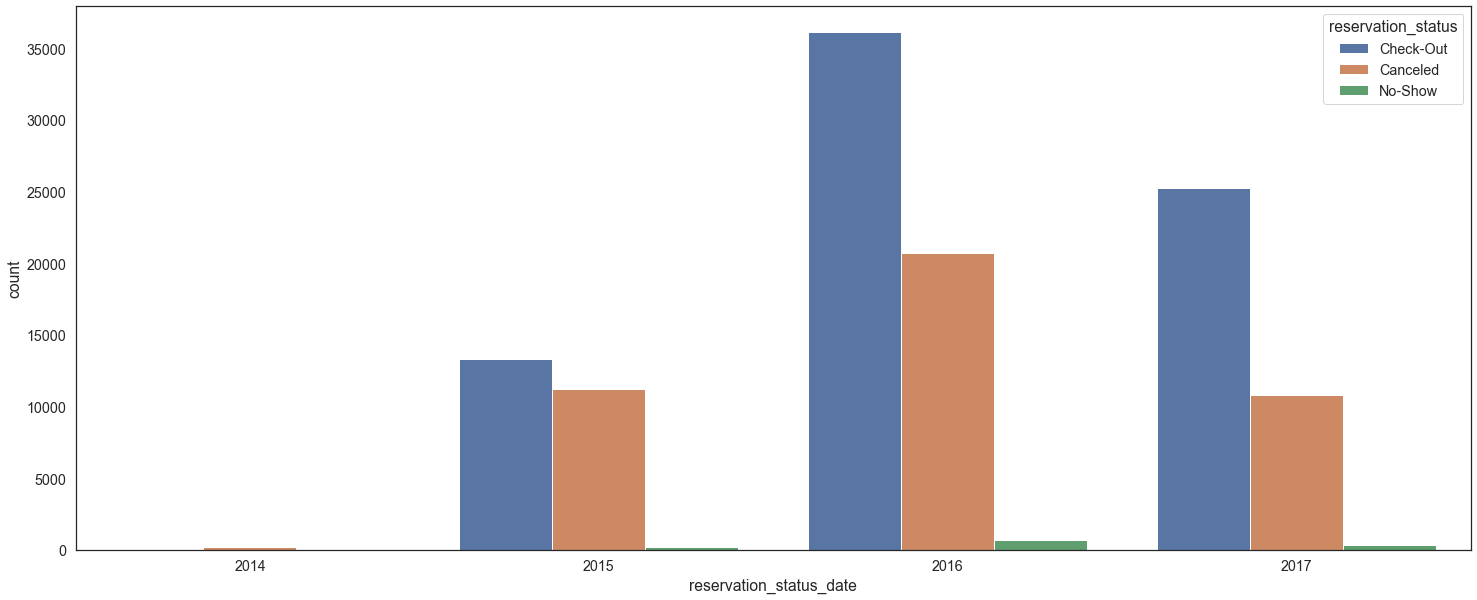

In [139]:
#Créeation des statistiques récapitulatives de jeu de données - Date variables
plt.rcParams['figure.figsize'] = [25, 10]
sns.countplot(x=hotels_df['reservation_status_date'].dt.year, hue = hotels_df['reservation_status'] ,data=hotels_df)


<AxesSubplot:xlabel='arrival_date', ylabel='count'>

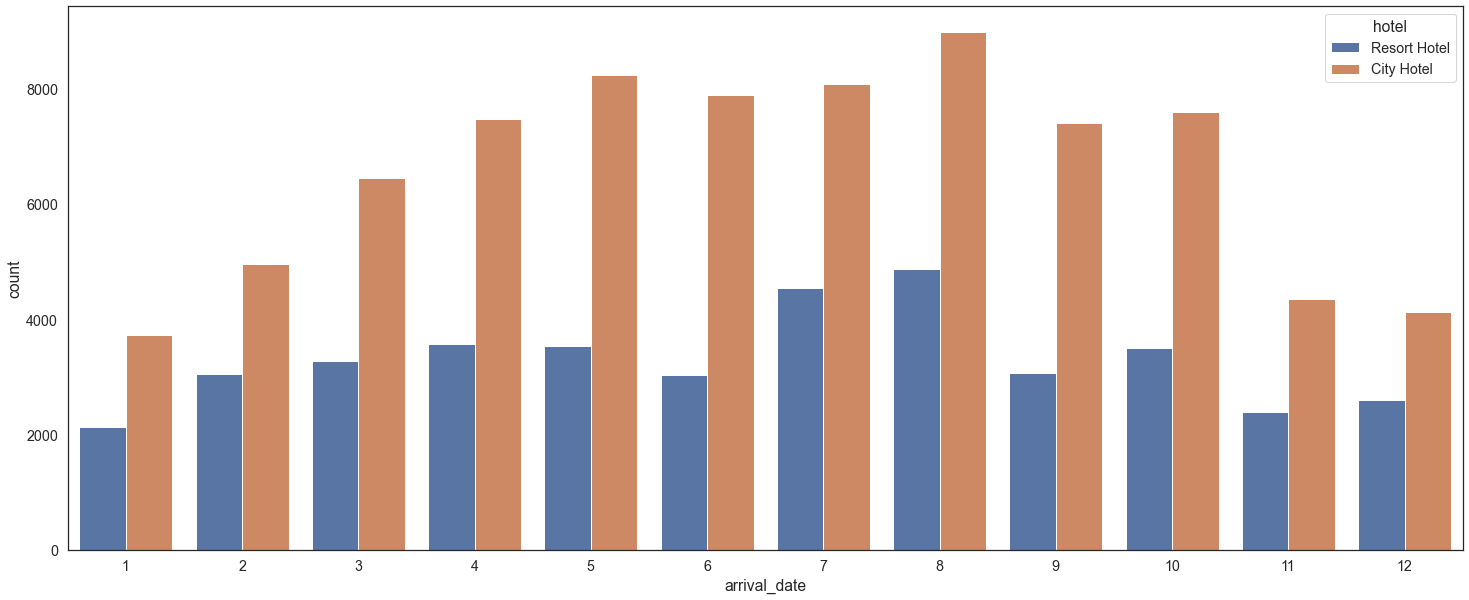

In [140]:
#Nombre de réservations par mois (dans chaque annee)
plt.rcParams['figure.figsize'] = [25, 10]
sns.countplot(x=hotels_df['arrival_date'].dt.month, hue = hotels_df['hotel'],data=hotels_df)


In [141]:
#Créeation des statistiques récapitulatives de jeu de données - Date variables
hotels_df_date = hotels_df[['arrival_date', 'reservation_status_date']]

In [142]:
hotels_df_date.describe()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,arrival_date,reservation_status_date
count,118898,118898
unique,793,926
top,2015-12-05 00:00:00,2015-10-21 00:00:00
freq,448,1461
first,2015-07-01 00:00:00,2014-10-17 00:00:00
last,2017-08-31 00:00:00,2017-09-14 00:00:00


In [143]:
#Créeation des statistiques récapitulatives de jeu de données - Categorical variables
hotels_df_categories = hotels_df[['hotel','is_canceled','meal','country','market_segment','distribution_channel','is_repeated_guest',
                           'reserved_room_type','assigned_room_type','deposit_type','company','agent','customer_type',
                           'reservation_status']]


In [144]:
#describe() et corr() ici ne sont pas informatif car on a Categorical variables
hotels_df_categories.describe()

,is_canceled,is_repeated_guest,company,agent
count,118898.000000,118898.000000,6623.000000,102894.000000
mean,0.371352,0.032011,189.624792,86.545532
std,0.483168,0.176029,132.124298,110.714259
min,0.000000,0.000000,6.000000,1.000000
25%,0.000000,0.000000,62.000000,9.000000
50%,0.000000,0.000000,179.000000,14.000000
75%,1.000000,0.000000,270.000000,229.000000
max,1.000000,1.000000,543.000000,535.000000


In [145]:
hotels_df_categories.corr()

,is_canceled,is_repeated_guest,company,agent
is_canceled,1.000000,-0.085179,-0.024385,-0.081939
is_repeated_guest,-0.085179,1.000000,-0.249554,0.031624
company,-0.024385,-0.249554,1.000000,0.350746
agent,-0.081939,0.031624,0.350746,1.000000


<AxesSubplot:xlabel='customer_type', ylabel='count'>

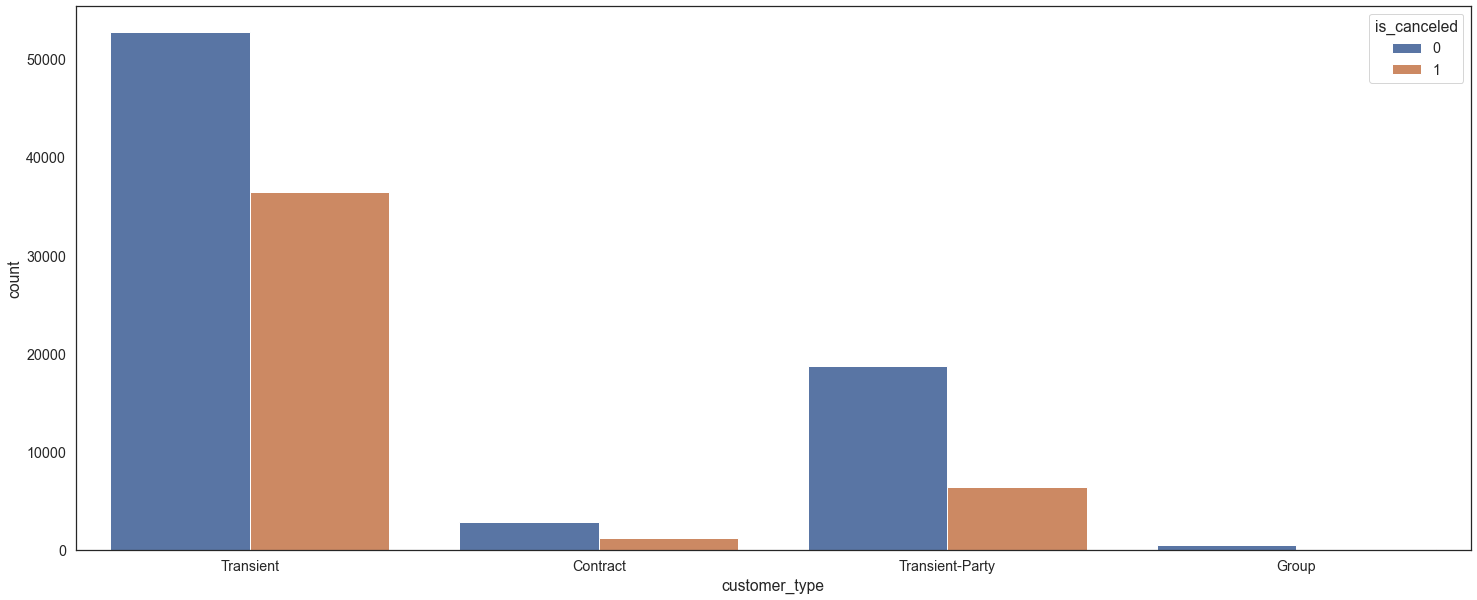

In [146]:
#visualisation de le variable is_canceled selon chaque type des consommateurs 
sns.countplot(x=hotels_df_categories['customer_type'], hue=hotels_df_categories['is_canceled'],
              data=hotels_df_categories)

In [147]:
#Créeation des statistiques récapitulatives de jeu de données - Categorical variables
hotels_df_numeric = hotels_df[['lead_time','stays_in_weekend_nights','stays_in_week_nights','adults','children',
                              'babies','previous_cancellations','previous_bookings_not_canceled','booking_changes',
                              'days_in_waiting_list','adr','required_car_parking_spaces','total_of_special_requests']]

In [148]:
hotels_df_numeric.describe()

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,104.311435,0.928897,2.502145,1.858391,0.104207,0.007948,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683
std,106.903309,0.996216,1.900168,0.578576,0.399172,0.097380,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,18.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,69.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,161.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,737.000000,16.000000,41.000000,55.000000,10.000000,10.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


(0.0, 400.0)

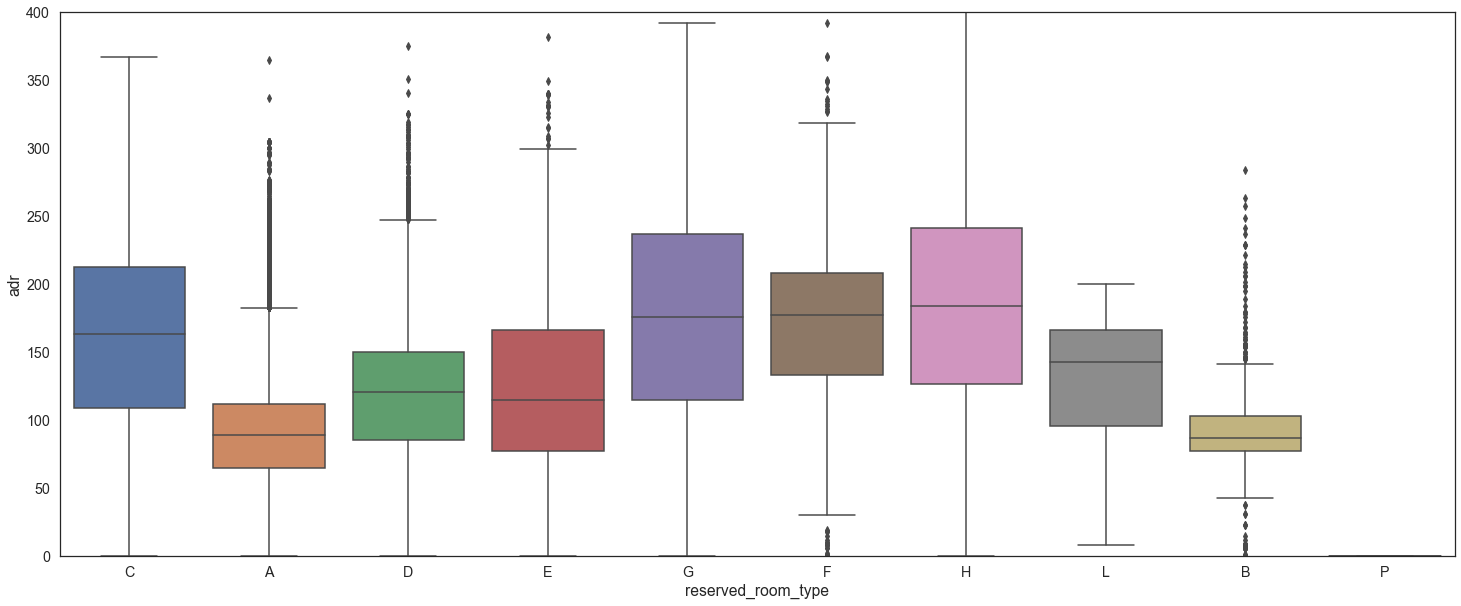

In [149]:
sns.boxplot(x = 'reserved_room_type', y = 'adr', data = hotels_df)
plt.ylim(0, 400)

<AxesSubplot:xlabel='hotel', ylabel='count'>

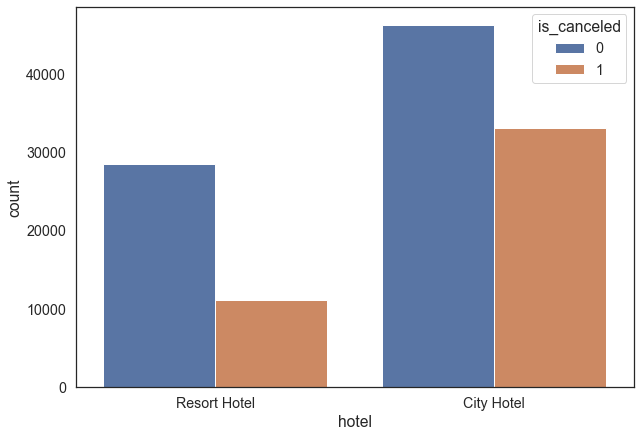

In [150]:
#Check the distribution of hotel type for cancellation
plt.rcParams['figure.figsize'] = [10, 7]
sns.set(style = 'white', font_scale = 1.3)
sns.countplot(x=hotels_df['hotel'], hue=hotels_df['is_canceled'], data =hotels_df)

In [151]:
resort_h = hotels_df[(hotels_df['hotel']=='Resort Hotel') & (hotels_df['is_canceled']== 1)].count()[1]
city_h = hotels_df[(hotels_df['hotel']=='City Hotel') & (hotels_df['is_canceled'] == 1)].count()[1]

print("le nombre d'annulation dans Resort Hotel est ", resort_h)
print("le nombre d'annulation dans City Hotel est ", city_h)

le nombre d'annulation dans Resort Hotel est  11077
le nombre d'annulation dans City Hotel est  33076


<AxesSubplot:xlabel='adults', ylabel='count'>

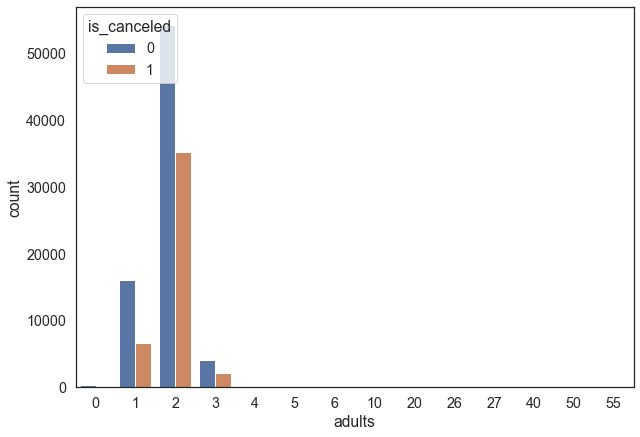

In [152]:
#Plot distribution of cancellation and Number of Adults
sns.countplot(x=hotels_df['adults'], hue= hotels_df['is_canceled'],data =hotels_df)

In [153]:
for i in hotels_df['adults'].unique():
    print("pour ",i," adulte(s), le nombre des annulations est", hotels_df[hotels_df['adults']==i].count()[1])

pour  2  adulte(s), le nombre des annulations est 89495
pour  1  adulte(s), le nombre des annulations est 22735
pour  3  adulte(s), le nombre des annulations est 6197
pour  4  adulte(s), le nombre des annulations est 62
pour  40  adulte(s), le nombre des annulations est 1
pour  26  adulte(s), le nombre des annulations est 5
pour  50  adulte(s), le nombre des annulations est 1
pour  27  adulte(s), le nombre des annulations est 2
pour  55  adulte(s), le nombre des annulations est 1
pour  0  adulte(s), le nombre des annulations est 393
pour  20  adulte(s), le nombre des annulations est 2
pour  6  adulte(s), le nombre des annulations est 1
pour  5  adulte(s), le nombre des annulations est 2
pour  10  adulte(s), le nombre des annulations est 1


# Machine Learning

In [154]:
hotels_df['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Aviation'], dtype=object)

In [155]:
hotels_df['hotel'] = hotels_df['hotel'].map({'Resort Hotel':0, 'City Hotel':1}).astype(int)
hotels_df['meal'] = hotels_df['meal'].map({'BB':0, 'FB':1, 'HB':2, 'SC':3, 'Undefined':4 }).astype(int)
hotels_df['customer_type'] = hotels_df['customer_type'].map({'Transient':0, 'Contract':1, 'Transient-Party':2,
                                                             'Group':3}).astype(int)
hotels_df['reservation_status'] = hotels_df['reservation_status'].map({'Check-Out':0, 'Canceled':1, 'No-Show':2
                                                                      }).astype(int)
hotels_df['deposit_type'] = hotels_df['deposit_type'].map({'No Deposit':0, 'Contract':1, 'Refundable':2,
                                                             'Non Refund':3}).astype(int)

In [156]:
hotels_df.corr()['is_canceled']

hotel                             0.133964
is_canceled                       1.000000
lead_time                         0.291994
arrival_date_week_number          0.007465
stays_in_weekend_nights          -0.002631
stays_in_week_nights              0.024110
adults                            0.058381
children                          0.004751
babies                           -0.032521
meal                             -0.018657
is_repeated_guest                -0.085179
previous_cancellations            0.109922
previous_bookings_not_canceled   -0.055493
booking_changes                  -0.144659
deposit_type                      0.479643
agent                            -0.081939
company                          -0.024385
days_in_waiting_list              0.054016
customer_type                    -0.137180
adr                               0.046199
required_car_parking_spaces      -0.194796
total_of_special_requests        -0.235643
reservation_status                0.980603
Name: is_ca

In [213]:
X = hotels_df[['hotel','lead_time','previous_cancellations', 'booking_changes','deposit_type',
               'customer_type','required_car_parking_spaces','total_of_special_requests']]
y = hotels_df['is_canceled']

In [214]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (83228, 8) (83228,)
Test set: (35670, 8) (35670,)


In [245]:
# import
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn import metrics

## Logistic regression

In [246]:
from sklearn.linear_model import LogisticRegression

In [247]:
logistic_Regr = LogisticRegression()

In [248]:
logistic_Regr.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [249]:
logistic_Regr.score(X_test, y_test)

0.7699186991869919

In [250]:
#Measuring Accuracy Using Cross-Validation
cross_val_score(logistic_Regr, X_train, y_train, cv=3, scoring="accuracy")

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    

array([0.77129366, 0.7721227 , 0.77287146])

In [251]:
#Matrice de confusion
y_pred = cross_val_predict(logistic_Regr, X_train, y_train, cv=3)
confusion_matrix(y_train,y_pred)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    

array([[50259,  2103],
       [16865, 14001]])

In [252]:
#Precision et Recall et F1 score
from sklearn.metrics import precision_score, recall_score, f1_score
precision_LR = precision_score(y_train, y_pred)
recall_LR = recall_score(y_train, y_pred)
f1_LR = f1_score(y_train, y_pred)
print("Precision = ", precision_LR)
print("recall = ", recall_LR)
print("F1 score = ", f1_LR)

Precision =  0.8694113263785395
recall =  0.45360590941489015
F1 score =  0.5961677666595699


## K nearest neighbor (KNN)

In [253]:
from sklearn.neighbors import KNeighborsClassifier

In [254]:
#choix de K
Ks = 10
# on initialise le tableau qui contiendra les différents résultats
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
for n in range(1,Ks):
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_acc

array([0.73285674, 0.76986263, 0.75923745, 0.76958228, 0.7654051 ,
       0.77232969, 0.76823661, 0.77381553, 0.77084385])

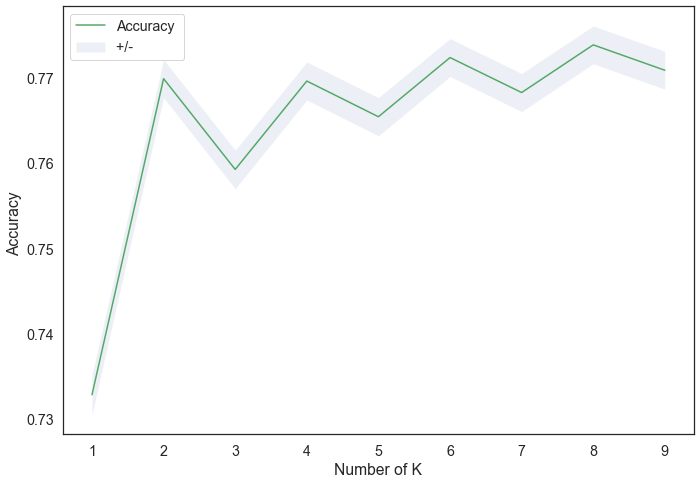

In [165]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- '))
plt.ylabel('Accuracy ')
plt.xlabel('Number of K')
plt.tight_layout()

In [255]:
# le bon nombre de voisins k est 8
model_neigh = KNeighborsClassifier(n_neighbors = 8).fit(X_train,y_train)
y_hat=model_neigh.predict(X_test)

In [256]:
#Measuring Accuracy Using Cross-Validation
cross_val_score(model_neigh, X_train, y_train, cv=3, scoring="accuracy")

array([0.76776124, 0.77003208, 0.77132146])

In [259]:
# Matrice de confusion
y_pred = cross_val_predict(model_neigh, X_train, y_train, cv=3)
confusion_matrix(y_train,y_pred)

array([[47014,  5348],
       [13819, 17047]])

In [258]:
#Precision et Recall et F1 score
precision_LR = precision_score(y_train, y_pred)
recall_LR = recall_score(y_train, y_pred)
f1_LR = f1_score(y_train, y_pred)
print("Precision = ", precision_LR)
print("recall = ", recall_LR)
print("F1 score = ", f1_LR)

Precision =  0.7611966956910025
recall =  0.5522905462321
F1 score =  0.6401306772309945


## SVM

In [166]:
from sklearn.svm import SVC

In [167]:
model_svm = SVC()
model_svm.fit(X_train, y_train)

SVC()

In [168]:
model_svm.score(X_test, y_test)

0.7462853938884216

In [260]:
#Measuring Accuracy Using Cross-Validation
cross_val_score(model_svm, X_train, y_train, cv=3, scoring="accuracy")

array([0.74598998, 0.74735969, 0.74749477])

In [261]:
# Matrice de confusion
y_pred = cross_val_predict(model_svm, X_train, y_train, cv=3)
confusion_matrix(y_train,y_pred)

array([[51212,  1150],
       [19911, 10955]])

In [262]:
#Precision et Recall et F1 score
precision_LR = precision_score(y_train, y_pred)
recall_LR = recall_score(y_train, y_pred)
f1_LR = f1_score(y_train, y_pred)
print("Precision = ", precision_LR)
print("recall = ", recall_LR)
print("F1 score = ", f1_LR)

Precision =  0.9049979347377117
recall =  0.3549212725976803
F1 score =  0.5098787554397152


## Kmeans

In [188]:
from sklearn.cluster import KMeans

In [206]:
X = hotels_df[['hotel','lead_time','previous_cancellations', 'booking_changes','deposit_type',
               'customer_type','required_car_parking_spaces','total_of_special_requests','reservation_status']]
y = hotels_df['is_canceled']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (83228, 9) (83228,)
Test set: (35670, 9) (35670,)


In [190]:
kmeans = KMeans(n_clusters=2).fit(X_train)

In [191]:
centroids = kmeans.cluster_centers_
print(centroids)

[[6.61439084e-01 4.88656811e+01 3.70758832e-02 2.13348650e-01
  1.93686944e-01 3.99876802e-01 7.40851730e-02 6.07631605e-01
  3.18383112e-01]
 [6.80036266e-01 2.48686642e+02 2.10992142e-01 2.38623608e-01
  8.34038511e-01 6.45583283e-01 2.98765219e-02 4.80614800e-01
  5.43476384e-01]]


In [192]:
count = 0
for i in range(len(kmeans.predict(X_test))):
    if kmeans.predict(X_test)[i] == y_test.tolist()[i]:
        count = count + 1
print(count/len(kmeans.predict(X_test)))

0.6537987104008971
